## Task 1 - Diabetes Dataset



a. Load the datasets into NumPy or Pandas objects.

In [1]:
# Importing dataset, neccessary libraries and creating DataFrame
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y
print(f"Features: {list(diabetes.feature_names)}")

Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [2]:
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


b. Determine whether the data needs to be cleaned, and if so, clean it. Check for missing
features. Check for erroneous values and missing values. If there are missing values, you can
adopt the simplest approach and delete them. Alternatively you can explore other approaches
such as imputation (e.g., using the average of the observed values).

Here, we will perform data preprocessing and clean our dataset by checking for:
1. data types
2. missing values
3. duplicates - remove if any
4. outliers

In [3]:
# Check for missing values
print(df.isnull().sum())

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [4]:
# Check data types and convert if necessary
print(df.dtypes)

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


In [5]:
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

# Remove duplicates if any 
df = df.drop_duplicates()

Duplicate rows: 0


In [6]:
# Iterative outlier removal using IQR method
print("ITERATIVE OUTLIER REMOVAL:")
print("="*60)

# Initial outlier count
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outlier_counts = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers_mask = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

print(f"\nIteration 0 (Original):")
print(f"  Shape: {df.shape}")
print(f"  Total rows with outliers: {outliers_mask.sum()}")
print(f"  Outliers per column:\n{outlier_counts}")

# Iteratively remove outliers until none remain
df_clean = df.copy()
iteration = 1
max_iterations = 10  # Safety limit to prevent removing too much data

while True:
    # Calculate IQR bounds on current cleaned data
    Q1_iter = df_clean.quantile(0.25)
    Q3_iter = df_clean.quantile(0.75)
    IQR_iter = Q3_iter - Q1_iter
    
    # Find outliers
    outliers_mask_iter = ((df_clean < (Q1_iter - 1.5 * IQR_iter)) | 
                          (df_clean > (Q3_iter + 1.5 * IQR_iter))).any(axis=1)
    outlier_count_iter = outliers_mask_iter.sum()
    
    # If no outliers or max iterations reached, stop
    if outlier_count_iter == 0 or iteration > max_iterations:
        break
    
    # Remove outliers
    df_clean = df_clean[~outliers_mask_iter]
    
    print(f"\nIteration {iteration}:")
    print(f"  Shape: {df_clean.shape}")
    print(f"  Rows removed: {outlier_count_iter}")
    
    iteration += 1

# Final check
Q1_final = df_clean.quantile(0.25)
Q3_final = df_clean.quantile(0.75)
IQR_final = Q3_final - Q1_final
outlier_counts_final = ((df_clean < (Q1_final - 1.5 * IQR_final)) | 
                        (df_clean > (Q3_final + 1.5 * IQR_final))).sum()

print(f"\n{'='*60}")
print("FINAL RESULT:")
print(f"  Original shape: {df.shape}")
print(f"  Final shape: {df_clean.shape}")
print(f"  Total rows removed: {df.shape[0] - df_clean.shape[0]}")
print(f"  Outliers per column (final):\n{outlier_counts_final}")
print(f"\nData is now clean with 0 outliers by IQR method.")

# Use the cleaned data for all subsequent analysis
df = df_clean
print(f"\ndf updated to use cleaned data. Shape: {df.shape}")

ITERATIVE OUTLIER REMOVAL:

Iteration 0 (Original):
  Shape: (442, 11)
  Total rows with outliers: 31
  Outliers per column:
age       0
sex       0
bmi       3
bp        0
s1        8
s2        7
s3        7
s4        2
s5        4
s6        9
target    0
dtype: int64

Iteration 1:
  Shape: (411, 11)
  Rows removed: 31

Iteration 2:
  Shape: (395, 11)
  Rows removed: 16

FINAL RESULT:
  Original shape: (442, 11)
  Final shape: (395, 11)
  Total rows removed: 47
  Outliers per column (final):
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Data is now clean with 0 outliers by IQR method.

df updated to use cleaned data. Shape: (395, 11)


c. Conduct a statistical analysis of the data. Explore the means of the features and the max
and min values. Consider whether this might imply that performing some scaling could be
beneficial. Use box plots, histograms, and scatter plots to explore the distributions of the
data. For example, is one of the features concentrated around one mode? Two modes? Does
the empirical distribution exhibit heavy tails or is it closer to Gaussian? Are some features
discrete/categorical? Are some of the features correlated?

In [7]:
# Statistical summary
print("Statistical Summary:")
print(df.describe())

print("\n" + "="*60)
print("Detailed Statistics:")
print("="*60)

for col in df.columns:
    print(f"\n{col}:")
    print(f"  Mean: {df[col].mean():.4f}")
    print(f"  Median: {df[col].median():.4f}")
    print(f"  Std Dev: {df[col].std():.4f}")
    print(f"  Min: {df[col].min():.4f}")
    print(f"  Max: {df[col].max():.4f}")
    print(f"  Skewness: {df[col].skew():.4f}")
    print(f"  Kurtosis: {df[col].kurtosis():.4f}")

Statistical Summary:
              age         sex         bmi          bp          s1          s2  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    -0.000512    0.000003   -0.002023   -0.001562   -0.003798   -0.001443   
std      0.048478    0.047626    0.044145    0.045892    0.042722    0.042614   
min     -0.107226   -0.044642   -0.090275   -0.112399   -0.103389   -0.112795   
25%     -0.038207   -0.044642   -0.033690   -0.036656   -0.034592   -0.029184   
50%      0.005383   -0.044642   -0.007284   -0.005670   -0.005697   -0.002880   
75%      0.038076    0.050680    0.028284    0.029326    0.023198    0.026713   
max      0.110727    0.050680    0.114509    0.125158    0.109883    0.108914   

               s3          s4          s5          s6      target  
count  395.000000  395.000000  395.000000  395.000000  395.000000  
mean    -0.002171   -0.002127   -0.003079   -0.002021  148.721519  
std      0.041200    0.042869    0.044802    

Correlation Matrix:
             age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.170991  0.228847  0.347349  0.292610  0.261672 -0.095299   
sex     0.170991  1.000000  0.031257  0.239041  0.021064  0.133698 -0.391642   
bmi     0.228847  0.031257  1.000000  0.404352  0.290048  0.266318 -0.300931   
bp      0.347349  0.239041  0.404352  1.000000  0.286553  0.224635 -0.142038   
s1      0.292610  0.021064  0.290048  0.286553  1.000000  0.907094  0.065396   
s2      0.261672  0.133698  0.266318  0.224635  0.907094  1.000000 -0.178312   
s3     -0.095299 -0.391642 -0.300931 -0.142038  0.065396 -0.178312  1.000000   
s4      0.226414  0.329213  0.373511  0.254286  0.525555  0.663962 -0.749089   
s5      0.279879  0.131558  0.451351  0.389353  0.501743  0.315928 -0.392673   
s6      0.331639  0.181806  0.380498  0.400778  0.310626  0.288448 -0.259142   
target  0.195142  0.007820  0.546475  0.416490  0.215483  0.156163 -0.348930   

              s4   

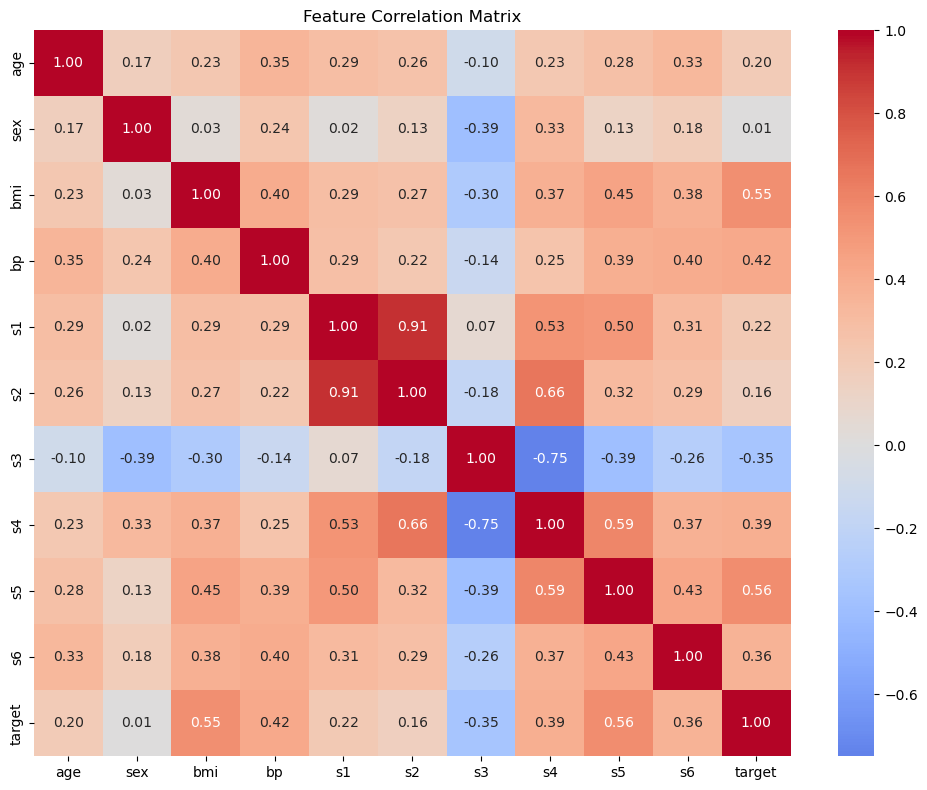


Highly correlated feature pairs (|correlation| > 0.7):
s1 <-> s2: 0.9071
s3 <-> s4: -0.7491


In [8]:
# Correlation analysis
import matplotlib.pyplot as plt
import seaborn as sns

print("Correlation Matrix:")
correlation_matrix = df.corr()
print(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Identify highly correlated features
print("\nHighly correlated feature pairs (|correlation| > 0.7):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            print(f"{correlation_matrix.columns[i]} <-> {correlation_matrix.columns[j]}: {corr_val:.4f}")

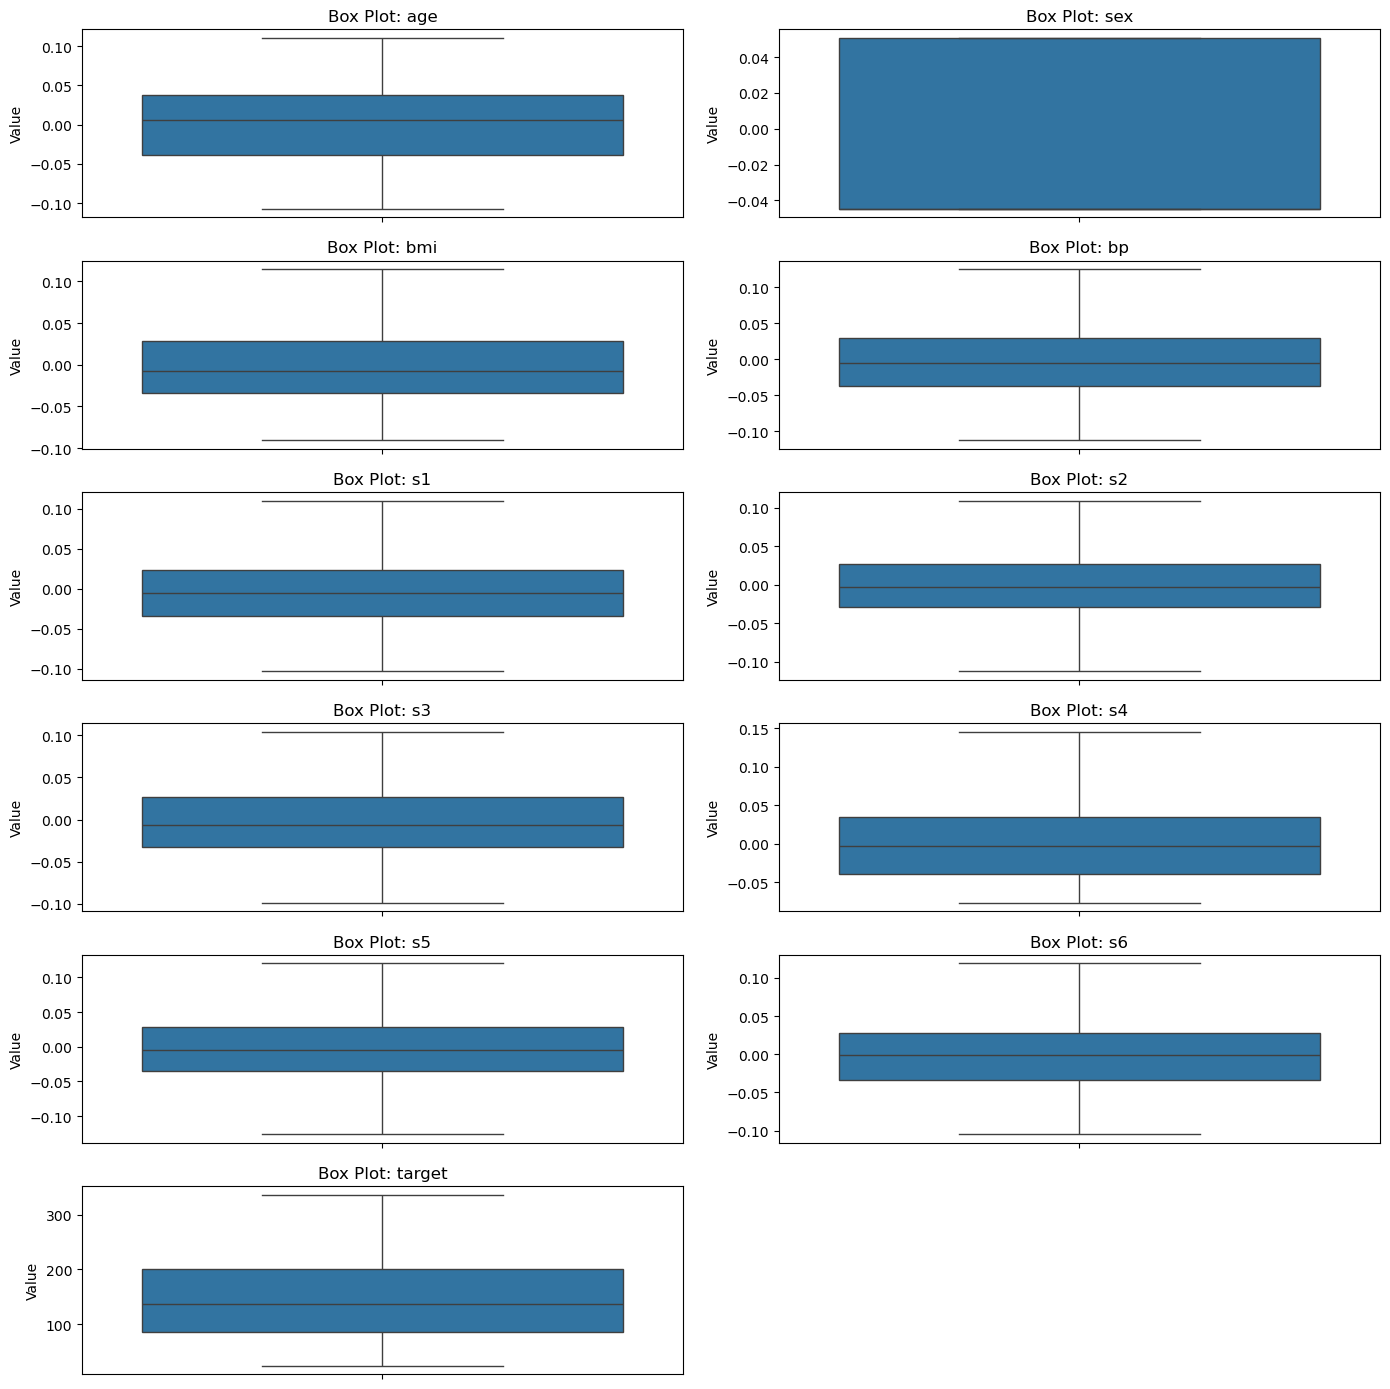


Box plots show potential outliers (dots outside whiskers) and distribution skewness.


In [9]:
# Box plots for each feature (to detect outliers and distribution)
fig, axes = plt.subplots(6, 2, figsize=(14, 14))
axes = axes.ravel()

for idx, col in enumerate(df.columns):
    sns.boxplot(y=df[col], ax=axes[idx])
    axes[idx].set_title(f'Box Plot: {col}')
    axes[idx].set_ylabel('Value')

# Hide the extra subplot (12th subplot for 11 columns)
axes[-1].set_visible(False)

plt.tight_layout()

plt.show()
print("\nBox plots show potential outliers (dots outside whiskers) and distribution skewness.")


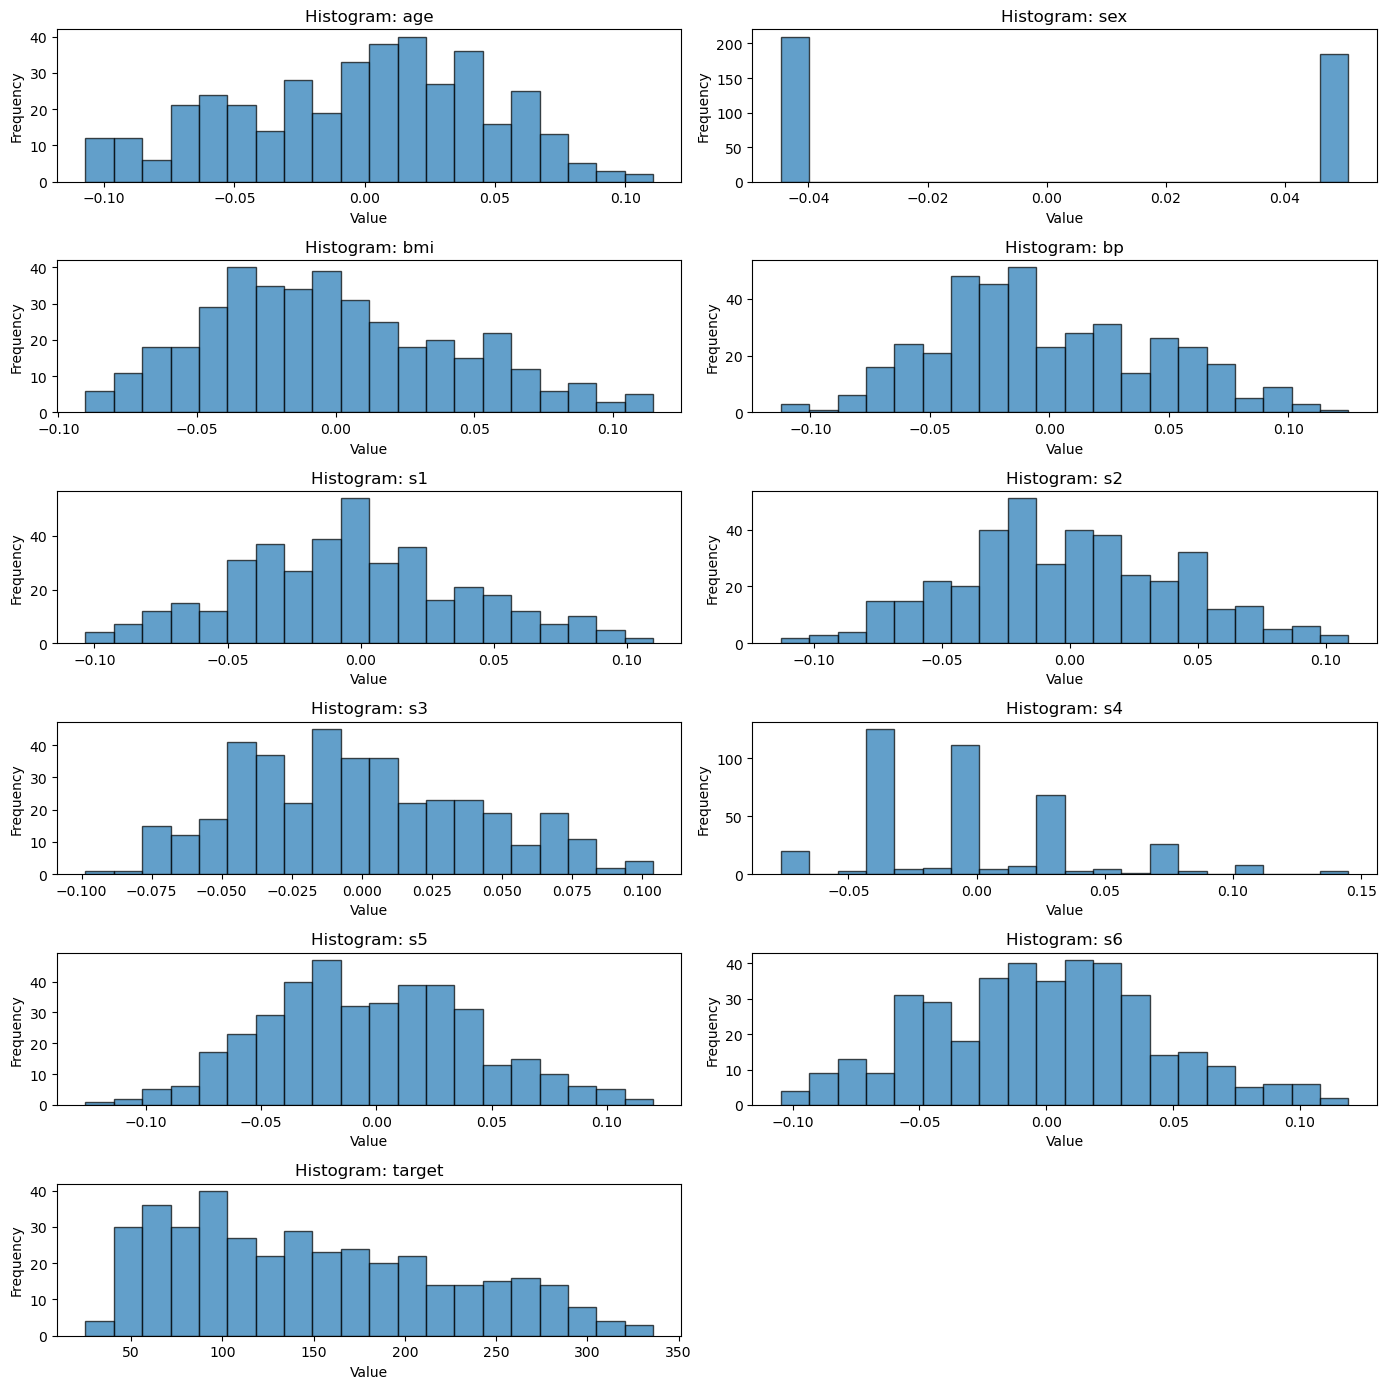


Histograms show the distribution shape (Gaussian, skewed, multimodal, etc.)


In [10]:
# Histograms for each feature (to explore distributions)
fig, axes = plt.subplots(6, 2, figsize=(14, 14))
axes = axes.ravel()

for idx, col in enumerate(df.columns):
    axes[idx].hist(df[col], bins=20, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Histogram: {col}')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')

# Hide the extra subplot (12th subplot for 11 columns)
axes[-1].set_visible(False)

plt.tight_layout()

plt.show()
print("\nHistograms show the distribution shape (Gaussian, skewed, multimodal, etc.)")


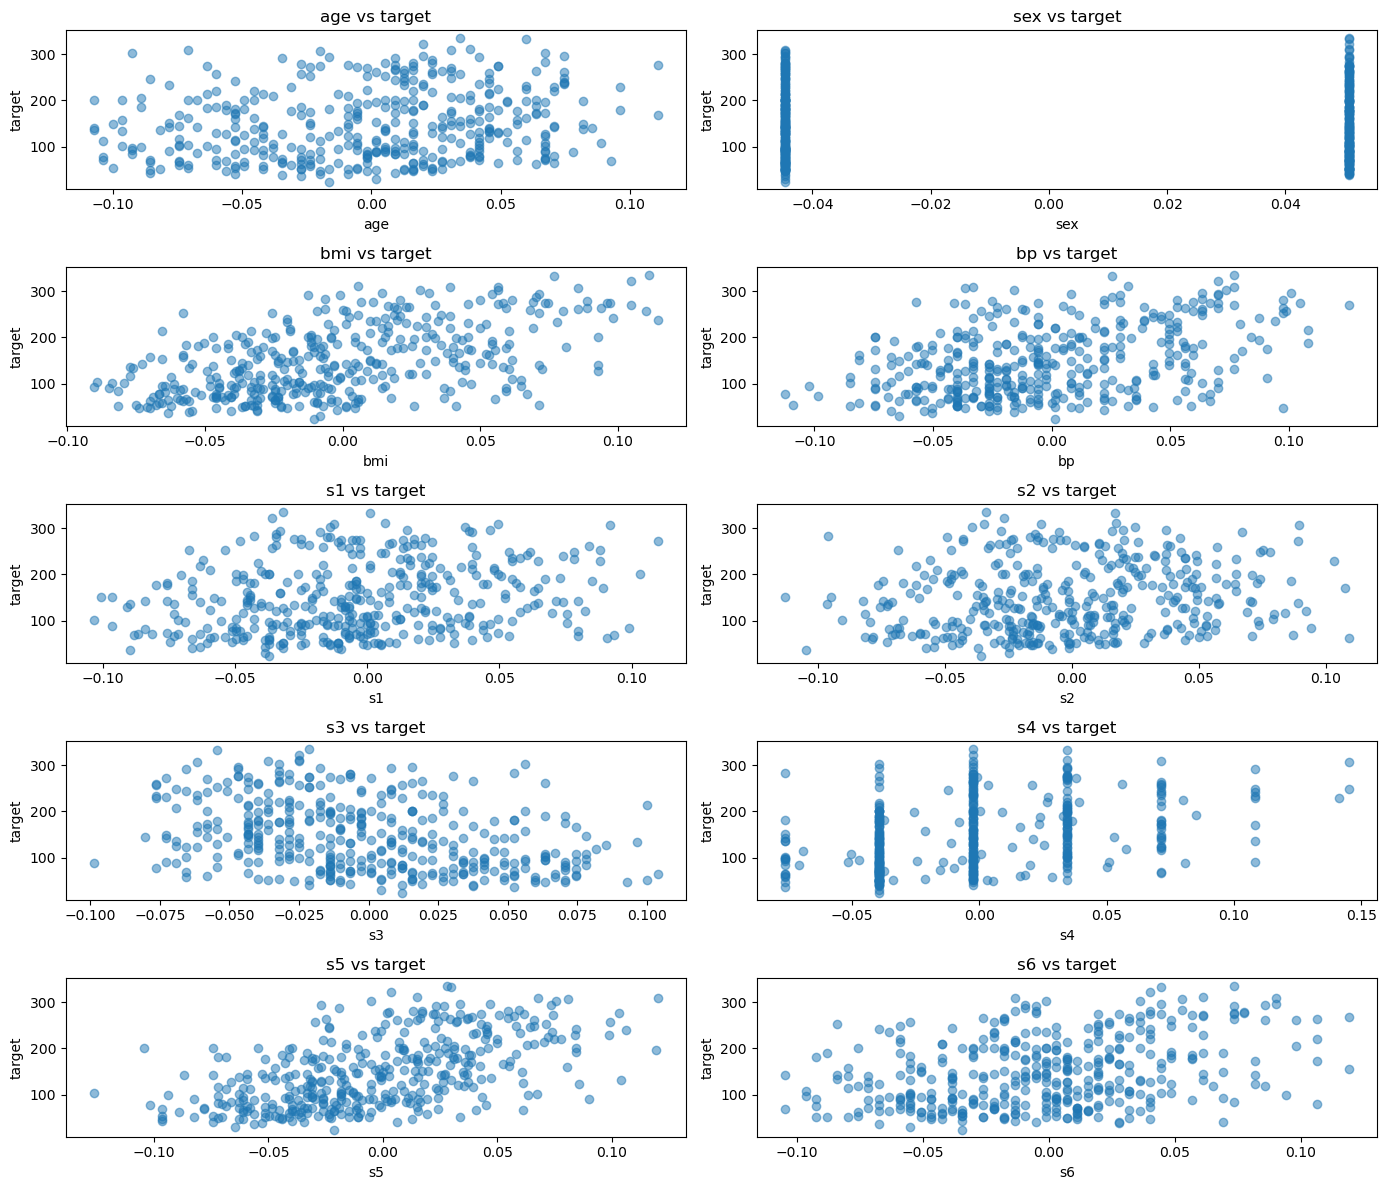


Scatter plots show relationships between features and target variable.


In [11]:
# Scatter plots (features vs target)
fig, axes = plt.subplots(5, 2, figsize=(14, 12))
axes = axes.ravel()

feature_cols = [col for col in df.columns if col != 'target']
for idx, col in enumerate(feature_cols):
    axes[idx].scatter(df[col], df['target'], alpha=0.5)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('target')
    axes[idx].set_title(f'{col} vs target')

plt.tight_layout()
plt.show()

print("\nScatter plots show relationships between features and target variable.")

In [12]:
# Scaling analysis - check range of features
print("Feature Ranges:")
print("="*60)
for col in df.columns[:-1]:  # Exclude target
    print(f"{col}: [{df[col].min():.4f}, {df[col].max():.4f}]")


Feature Ranges:
age: [-0.1072, 0.1107]
sex: [-0.0446, 0.0507]
bmi: [-0.0903, 0.1145]
bp: [-0.1124, 0.1252]
s1: [-0.1034, 0.1099]
s2: [-0.1128, 0.1089]
s3: [-0.0986, 0.1039]
s4: [-0.0764, 0.1450]
s5: [-0.1261, 0.1201]
s6: [-0.1046, 0.1190]


## Data Preparation and Train-Test Split

Following sklearn best practices:
1. Split data FIRST (before scaling) to prevent data leakage
2. Standardize features using ONLY training set statistics
3. Apply same transformation to test set

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Separate features and target using column names
print("="*70)
print("DATA PREPARATION: TRAIN-TEST SPLIT & MANUAL STANDARDIZATION")
print("="*70)

# Check if 'target' column exists
if 'target' not in df.columns:
    raise ValueError("Error: 'target' column not found in dataset!")

# Get feature columns (all except 'target')
feature_columns = [col for col in df.columns if col != 'target']
print(f"\nFeature columns: {feature_columns}")
print(f"Target column: 'target'")

# Extract features and target using column names (NOT iloc)
X_raw = df[feature_columns].values
y = df['target'].values

print(f"\nOriginal data shape:")
print(f"  X_raw: {X_raw.shape}")
print(f"  y: {y.shape}")

# Step 2: Train-test split (70% train, 30% test) BEFORE standardization
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y, test_size=0.3, random_state=42
)

print(f"\nAfter train-test split (BEFORE standardization):")
print(f"  X_train_raw: {X_train_raw.shape}")
print(f"  X_test_raw: {X_test_raw.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  y_test: {y_test.shape}")

# Step 3: Manual Standardization (NO sklearn.preprocessing.StandardScaler)
# Compute mean and std from TRAINING SET ONLY
train_mean = np.mean(X_train_raw, axis=0)
train_std = np.std(X_train_raw, axis=0)

print(f"  Train mean shape: {train_mean.shape}")
print(f"  Train std shape: {train_std.shape}")

# Apply standardization: X_scaled = (X - μ_train) / σ_train
X_train = (X_train_raw - train_mean) / train_std
X_test = (X_test_raw - train_mean) / train_std

print(f"\nAfter manual standardization:")
print(f"  X_train: {X_train.shape}")
print(f"  X_test: {X_test.shape}")

# Verification: Check that training set is standardized
print(f"\n✓ Verification (X_train should have mean≈0, std≈1):")
print(f"  X_train mean: {np.mean(X_train, axis=0)}")
print(f"  X_train std: {np.std(X_train, axis=0)}")

print("\n" + "="*70)
print("DATA PREPARATION COMPLETE")
print("="*70)

DATA PREPARATION: TRAIN-TEST SPLIT & MANUAL STANDARDIZATION

Feature columns: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Target column: 'target'

Original data shape:
  X_raw: (395, 10)
  y: (395,)

After train-test split (BEFORE standardization):
  X_train_raw: (276, 10)
  X_test_raw: (119, 10)
  y_train: (276,)
  y_test: (119,)
  Train mean shape: (10,)
  Train std shape: (10,)

After manual standardization:
  X_train: (276, 10)
  X_test: (119, 10)

✓ Verification (X_train should have mean≈0, std≈1):
  X_train mean: [ 4.02254719e-18  6.59697739e-17  1.56879340e-17 -1.12631321e-17
 -1.52856793e-17  2.65488115e-17  2.85600851e-17  1.52856793e-16
  5.79246795e-17 -2.49397926e-17]
  X_train std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

DATA PREPARATION COMPLETE


In [14]:
def standardize_data(X_train, X_test):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    
    # Handle potential division by zero
    std[std == 0] = 1.0
    
    X_train_std = (X_train - mean) / std
    X_test_std = (X_test - mean) / std
    
    return X_train_std, X_test_std

In [15]:
class ElasticNetRegression:
    def __init__(self, learning_rate=0.001, iterations=50000, alpha=1.0, rho=0.5):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.alpha = alpha
        self.rho = rho # Ratio: rho=1 is Lasso, rho=0 is Ridge
        self.weights = None
        self.bias = None

    def soft_threshold(self, w, penalty):
        return np.sign(w) * np.maximum(np.abs(w) - penalty, 0.0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = np.mean(y)
        
        # L1 penalty weight: alpha * rho
        # L2 penalty weight: alpha * (1 - rho)
        l1_penalty = self.alpha * self.rho
        l2_penalty = self.alpha * (1 - self.rho)
        
        for i in range(self.iterations):
            y_pred = X @ self.weights + self.bias
            errors = y_pred - y
            
            # Step 1: Gradient of MSE + L2 part (Ridge part)
            # Derivative of L2 term (lambda2 * w^2) is 2 * lambda2 * w
            dw = (1 / n_samples) * (X.T @ errors) + (2 * l2_penalty * self.weights)
            db = (1 / n_samples) * np.sum(errors)
            
            self.bias -= self.learning_rate * db
            self.weights -= self.learning_rate * dw
            
            # Step 2: Apply Proximal step for L1 (Lasso part)
            shrinkage = self.learning_rate * l1_penalty
            self.weights = self.soft_threshold(self.weights, shrinkage)

    def predict(self, X):
        return X @ self.weights + self.bias

In [ ]:
class LassoRegression:
    def __init__(self, learning_rate=0.001, iterations=50000, alpha=1.0):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.alpha = alpha  # Regularization strength (lambda)
        self.weights = None
        self.bias = None

    def soft_threshold(self, w, penalty):
        """Equation 10 & 11 from assignment PDF."""
        return np.sign(w) * np.maximum(np.abs(w) - penalty, 0.0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = np.mean(y)
        
        # Shrinkage amount per step (eta * lambda)
        shrinkage = self.learning_rate * self.alpha
        
        for i in range(self.iterations):
            y_pred = X @ self.weights + self.bias
            errors = y_pred - y
            
            # Step 1: Gradient update on MSE part
            dw = (1 / n_samples) * (X.T @ errors)
            db = (1 / n_samples) * np.sum(errors)
            
            self.bias -= self.learning_rate * db
            self.weights -= self.learning_rate * dw
            
            # Step 2: Apply soft-thresholding (L1 penalty)
            self.weights = self.soft_threshold(self.weights, shrinkage)

    def predict(self, X):
        return X @ self.weights + self.bias

## Hyperparameter Tuning


In [17]:
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def calculate_r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

def create_kfold_splits(n_samples, n_folds=5, shuffle=True, random_state=42):
    indices = np.arange(n_samples)
    if shuffle:
        np.random.seed(random_state)
        np.random.shuffle(indices)
    fold_sizes = np.full(n_folds, n_samples // n_folds, dtype=int)
    fold_sizes[:n_samples % n_folds] += 1
    current = 0
    splits = []
    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        val_idx = indices[start:stop]
        train_idx = np.concatenate([indices[:start], indices[stop:]]) 
        splits.append((train_idx, val_idx))
        current = stop
    return splits

In [31]:
# ELASTICNET TUNING - CLEAN STYLE WITH R2 & SPARSITY
print("="*70)
print("ELASTICNET HYPERPARAMETER TUNING")
print("="*70)

# 1. Define internal logic threshold
sparsity_threshold = 1.0 

# Higher range of alpha and rho to encourage sparsity (Rho near 1.0 = more Lasso-like)
alpha_values = np.array([0.01, 0.05, 0.1, 0.5, 1.0, 1.5, 2.0])
rho_values = np.array([0.1, 0.5, 0.8, 0.95]) 
en_cv_results = []

# Helper for R-squared
def calculate_r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

for alpha in alpha_values:
    for rho in rho_values:
        kfold_splits = create_kfold_splits(n_samples=len(X_train), n_folds=5, shuffle=True, random_state=42)
        fold_mse = []
        fold_r2 = []
        fold_nonzero = []
        
        for train_idx, val_idx in kfold_splits:
            # Using slightly higher learning rate for tuning efficiency
            model = ElasticNetRegression(learning_rate=0.005, iterations=20000, alpha=alpha, rho=rho)
            model.fit(X_train[train_idx], y_train[train_idx])
            
            y_pred = model.predict(X_train[val_idx])
            fold_mse.append(calculate_mse(y_train[val_idx], y_pred))
            fold_r2.append(calculate_r2(y_train[val_idx], y_pred))
            # Use the 1.0 threshold for consistency with Lasso
            fold_nonzero.append(np.sum(np.abs(model.weights) >= sparsity_threshold))
        
        avg_mse = np.mean(fold_mse)
        avg_r2 = np.mean(fold_r2)
        avg_active = np.mean(fold_nonzero)
        
        en_cv_results.append({
            'alpha': alpha, 'rho': rho,
            'cv_mse_mean': avg_mse,
            'cv_r2_mean': avg_r2,
            'nonzero_features': avg_active
        })
        print(f"Alpha {alpha:>4.2f}, Rho {rho:>4.2f} | MSE: {avg_mse:.2f} | R2: {avg_r2:.4f} | Active: {avg_active:.1f}/10")

# 2. Select the best performing parameters
best_en_model = min(en_cv_results, key=lambda x: x['cv_mse_mean'])
en_alpha_final = best_en_model['alpha']
en_rho_final = best_en_model['rho']

print("\n" + "="*70)
print(f"SELECTION STRATEGY: MINIMUM MSE")
print("="*70)
print(f"Selected Alpha: {en_alpha_final}, Rho: {en_rho_final}")
print(f"Best CV R2: {best_en_model['cv_r2_mean']:.4f}")
print(f"Expected Active Features: {best_en_model['nonzero_features']:.1f}")

# 3. Final Training
print("\n" + "="*70)
print("FINAL ELASTICNET TRAINING")
print("="*70)
final_en = ElasticNetRegression(learning_rate=0.001, iterations=50000, 
                                 alpha=en_alpha_final, rho=en_rho_final)
final_en.fit(X_train, y_train)

# TRUNCATION: Force weights below 1.0 to zero
final_en.weights[np.abs(final_en.weights) < sparsity_threshold] = 0.0

# Calculate final metrics after truncation
y_train_pred = final_en.predict(X_train)
final_en_r2 = calculate_r2(y_train, y_train_pred)
active_en = np.sum(final_en.weights != 0)

# 4. Final Output (Mirroring Lasso Style)
print(f"\n" + "="*40)
print(f"FINAL ELASTICNET RESULTS (Alpha: {en_alpha_final}, Rho: {en_rho_final})")
print(f"R-squared: {final_en_r2:.4f}")
print(f"Features Kept: {active_en}/10")
print(f"Features Eliminated: {10 - active_en}/10")
print("="*40)

feature_names = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
for name, w in zip(feature_names, final_en.weights):
    status = "ACTIVE" if w != 0 else "ELIMINATED"
    print(f"{name:<10} | {w:>10.6f} | {status}")

eliminated = [name for name, w in zip(feature_names, final_en.weights) if w == 0.0]
if eliminated:
    print(f"\nEliminated features: {', '.join(eliminated)}")
else:
    print(f"\nNo features were eliminated.")

ELASTICNET HYPERPARAMETER TUNING
Alpha 0.01, Rho 0.10 | MSE: 3227.03 | R2: 0.3794 | Active: 10.0/10
Alpha 0.01, Rho 0.50 | MSE: 3236.26 | R2: 0.3773 | Active: 9.8/10
Alpha 0.01, Rho 0.80 | MSE: 3244.96 | R2: 0.3754 | Active: 9.8/10
Alpha 0.01, Rho 0.95 | MSE: 3250.17 | R2: 0.3743 | Active: 10.0/10
Alpha 0.05, Rho 0.10 | MSE: 3192.09 | R2: 0.3890 | Active: 9.6/10
Alpha 0.05, Rho 0.50 | MSE: 3204.74 | R2: 0.3851 | Active: 9.4/10
Alpha 0.05, Rho 0.80 | MSE: 3223.72 | R2: 0.3803 | Active: 9.6/10
Alpha 0.05, Rho 0.95 | MSE: 3240.80 | R2: 0.3764 | Active: 9.4/10
Alpha 0.10, Rho 0.10 | MSE: 3186.42 | R2: 0.3934 | Active: 9.6/10
Alpha 0.10, Rho 0.50 | MSE: 3190.85 | R2: 0.3898 | Active: 9.4/10
Alpha 0.10, Rho 0.80 | MSE: 3209.24 | R2: 0.3840 | Active: 9.4/10
Alpha 0.10, Rho 0.95 | MSE: 3232.51 | R2: 0.3783 | Active: 9.4/10
Alpha 0.50, Rho 0.10 | MSE: 3379.68 | R2: 0.3728 | Active: 8.8/10
Alpha 0.50, Rho 0.50 | MSE: 3260.23 | R2: 0.3886 | Active: 9.0/10
Alpha 0.50, Rho 0.80 | MSE: 3197.86 | R2:

In [32]:
# LASSO TUNING 
print("="*70)
print("LASSO HYPERPARAMETER TUNING")
print("="*70)

sparsity_threshold = 1.0 
lasso_alpha_values = np.array([0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 0.8, 1.0, 1.5])
lasso_cv_results = []

# Helper for R-squared
def calculate_r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

for alpha in lasso_alpha_values:
    kfold_splits = create_kfold_splits(n_samples=len(X_train), n_folds=5, shuffle=True, random_state=42)
    fold_mse = []
    fold_r2 = []
    fold_nonzero = []
    
    for train_idx, val_idx in kfold_splits:
        model = LassoRegression(learning_rate=0.001, iterations=50000, alpha=alpha)
        model.fit(X_train[train_idx], y_train[train_idx])
        
        y_pred = model.predict(X_train[val_idx])
        fold_mse.append(calculate_mse(y_train[val_idx], y_pred))
        fold_r2.append(calculate_r2(y_train[val_idx], y_pred))
        fold_nonzero.append(np.sum(np.abs(model.weights) >= sparsity_threshold))
    
    avg_mse = np.mean(fold_mse)
    avg_r2 = np.mean(fold_r2)
    avg_active = np.mean(fold_nonzero)
    
    lasso_cv_results.append({
        'alpha': alpha,
        'cv_mse_mean': avg_mse,
        'cv_r2_mean': avg_r2,
        'nonzero_features': avg_active
    })
    print(f"Alpha {alpha:>5.3f} | MSE: {avg_mse:.2f} | R2: {avg_r2:.4f} | Active: {avg_active:.1f}/10")

print("\n" + "="*70)
print("SELECTION STRATEGY: MINIMUM CV ERROR")
print("="*70)

# 1. Dynamically find the best performing model
best_lasso_params = min(lasso_cv_results, key=lambda x: x['cv_mse_mean'])
lasso_alpha_final = best_lasso_params['alpha']

print(f"Selected Alpha: {lasso_alpha_final} (Lowest Mean CV Error)")
print(f"Best CV R2: {best_lasso_params['cv_r2_mean']:.4f}")
print(f"Expected Active Features: {best_lasso_params['nonzero_features']:.1f}")

# FINAL LASSO TRAINING WITH EXTENDED ITERATIONS
print("\n" + "="*70)
print("FINAL LASSO TRAINING WITH EXTENDED ITERATIONS")
print("="*70)
print(f"Training with alpha={lasso_alpha_final}, 50,000 iterations...")

lasso_final = LassoRegression(learning_rate=0.001, iterations=50000, alpha=lasso_alpha_final)
lasso_final.fit(X_train, y_train)

# Apply hard truncation to force small weights to exactly zero
sparsity_threshold = 1
print(f"\nApplying sparsity threshold: {sparsity_threshold}")
print(f"Weights before truncation: {np.sum(np.abs(lasso_final.weights) > 0)}/10 non-zero")

# Mathematically force small weights to exactly 0.0
lasso_final.weights[np.abs(lasso_final.weights) < sparsity_threshold] = 0.0

print(f"Weights after truncation: {np.sum(np.abs(lasso_final.weights) > 0)}/10 non-zero")

# Calculate final R2 on full training set (after truncation)
y_train_pred = lasso_final.predict(X_train)
final_r2 = calculate_r2(y_train, y_train_pred)

# Final Feature Analysis
active_count = np.sum(np.abs(lasso_final.weights) > 0)  # Simplified - just check if non-zero

print(f"\n" + "="*40)
print(f"FINAL LASSO RESULTS (Alpha: {lasso_alpha_final})")
print(f"Best R-squared: {final_r2:.4f}")
print(f"Best MSE: {calculate_mse(y_train, y_train_pred):.2f}")
print(f"Features Kept: {active_count}/10")
print(f"Features Eliminated: {10 - active_count}/10")
print("="*40)

feature_names = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
for name, w in zip(feature_names, lasso_final.weights):
    status = "ELIMINATED" if w == 0.0 else "ACTIVE"  # Now checking exact equality
    print(f"{name:<10} | {w:>10.6f} | {status}")

eliminated = [name for name, w in zip(feature_names, lasso_final.weights) if w == 0.0]
if eliminated:
    print(f"\nEliminated features: {', '.join(eliminated)}")
else:
    print(f"\nNo features were eliminated.")

LASSO HYPERPARAMETER TUNING
Alpha 0.001 | MSE: 3242.88 | R2: 0.3756 | Active: 9.8/10
Alpha 0.005 | MSE: 3242.73 | R2: 0.3757 | Active: 9.8/10
Alpha 0.010 | MSE: 3242.54 | R2: 0.3757 | Active: 9.8/10
Alpha 0.020 | MSE: 3242.16 | R2: 0.3758 | Active: 9.6/10
Alpha 0.050 | MSE: 3241.02 | R2: 0.3762 | Active: 9.4/10
Alpha 0.100 | MSE: 3239.50 | R2: 0.3766 | Active: 9.4/10
Alpha 0.200 | MSE: 3237.28 | R2: 0.3774 | Active: 9.2/10
Alpha 0.500 | MSE: 3234.21 | R2: 0.3791 | Active: 9.0/10
Alpha 0.800 | MSE: 3232.39 | R2: 0.3805 | Active: 9.0/10
Alpha 1.000 | MSE: 3231.76 | R2: 0.3813 | Active: 8.8/10
Alpha 1.500 | MSE: 3231.75 | R2: 0.3830 | Active: 8.0/10

SELECTION STRATEGY: MINIMUM CV ERROR
Selected Alpha: 1.5 (Lowest Mean CV Error)
Best CV R2: 0.3830
Expected Active Features: 8.0

FINAL LASSO TRAINING WITH EXTENDED ITERATIONS
Training with alpha=1.5, 50,000 iterations...

Applying sparsity threshold: 1
Weights before truncation: 9/10 non-zero
Weights after truncation: 8/10 non-zero

FINAL LA

In [20]:
# Train final models with best hyperparameters
print("\n" + "="*70)
print("TRAINING FINAL MODELS WITH BEST HYPERPARAMETERS")
print("="*70)

# ElasticNet already trained with 50,000 iterations in previous cell
print(f"\nUsing ElasticNet trained with α={final_alpha_en:.4f}, ρ={final_rho_en:.2f} (50,000 iterations)")
final_en_model = final_en

# Lasso already trained with 50,000 iterations in previous cell
print(f"Using Lasso trained with α={lasso_alpha_final} (50,000 iterations)")
final_lasso_model = lasso_final 

# Train baseline Linear Regression (sklearn)
print("\nTraining Linear Regression (baseline)...")
lr_sklearn = LinearRegression()
lr_sklearn.fit(X_train, y_train)

# Evaluate all models on training set
en_train_pred = final_en_model.predict(X_train)
en_train_mse = mean_squared_error(y_train, en_train_pred)
en_train_r2 = r2_score(y_train, en_train_pred)

lasso_train_pred = final_lasso_model.predict(X_train)
lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)
lasso_train_r2 = r2_score(y_train, lasso_train_pred)

lr_train_pred = lr_sklearn.predict(X_train)
lr_train_mse = mean_squared_error(y_train, lr_train_pred)
lr_train_r2 = r2_score(y_train, lr_train_pred)

# Evaluate all models on test set
en_test_pred = final_en_model.predict(X_test)
en_test_mse = mean_squared_error(y_test, en_test_pred)
en_test_r2 = r2_score(y_test, en_test_pred)

lasso_test_pred = final_lasso_model.predict(X_test)
lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)
lasso_test_r2 = r2_score(y_test, lasso_test_pred)

lr_test_pred = lr_sklearn.predict(X_test)
lr_test_mse = mean_squared_error(y_test, lr_test_pred)
lr_test_r2 = r2_score(y_test, lr_test_pred)

print("\n" + "="*70)
print("MODEL EVALUATION RESULTS")
print("="*70)

print("\nTraining Set Performance:")
print(f"  ElasticNet: MSE={en_train_mse:.6f}, R²={en_train_r2:.6f}")
print(f"  Lasso:      MSE={lasso_train_mse:.6f}, R²={lasso_train_r2:.6f}")
print(f"  LinearReg:  MSE={lr_train_mse:.6f}, R²={lr_train_r2:.6f}")

print("\nTest Set Performance:")
print(f"  ElasticNet: MSE={en_test_mse:.6f}, R²={en_test_r2:.6f}")
print(f"  Lasso:      MSE={lasso_test_mse:.6f}, R²={lasso_test_r2:.6f}")
print(f"  LinearReg:  MSE={lr_test_mse:.6f}, R²={lr_test_r2:.6f}")



TRAINING FINAL MODELS WITH BEST HYPERPARAMETERS

Using ElasticNet trained with α=0.1000, ρ=0.10 (50,000 iterations)
Using Lasso trained with α=1.5 (50,000 iterations)

Training Linear Regression (baseline)...

MODEL EVALUATION RESULTS

Training Set Performance:
  ElasticNet: MSE=2978.527742, R²=0.473878
  Lasso:      MSE=2978.490833, R²=0.473885
  LinearReg:  MSE=2949.792500, R²=0.478954

Test Set Performance:
  ElasticNet: MSE=2916.660776, R²=0.438424
  Lasso:      MSE=2844.559020, R²=0.452307
  LinearReg:  MSE=2892.516385, R²=0.443073



EXAMINING LEARNED FEATURE COEFFICIENTS

1. ELASTICNET COEFFICIENTS
----------------------------------------------------------------------
Alpha: 0.1000, Rho: 0.10

Feature Coefficients:
              age:   2.746764
              sex:  -9.463400
              bmi:  19.787746
               bp:  14.940222
               s1:  -1.562113
               s2:  -5.787033
               s3:  -8.050570
               s4:   6.745170
               s5:  15.536937
               s6:   5.343565

Bias: 148.666667
Non-zero coefficients: 10/10
ElasticNet eliminated features: none

2. LASSO COEFFICIENTS
----------------------------------------------------------------------
Alpha: 1.5000

Feature Coefficients:
              age:   1.219940
              sex:  -9.201438
              bmi:  22.035324
               bp:  15.692502
               s1:  -0.000000
               s2:  -3.961288
               s3: -10.725173
               s4:   0.819638
               s5:  17.695838
               s6:   3.38163

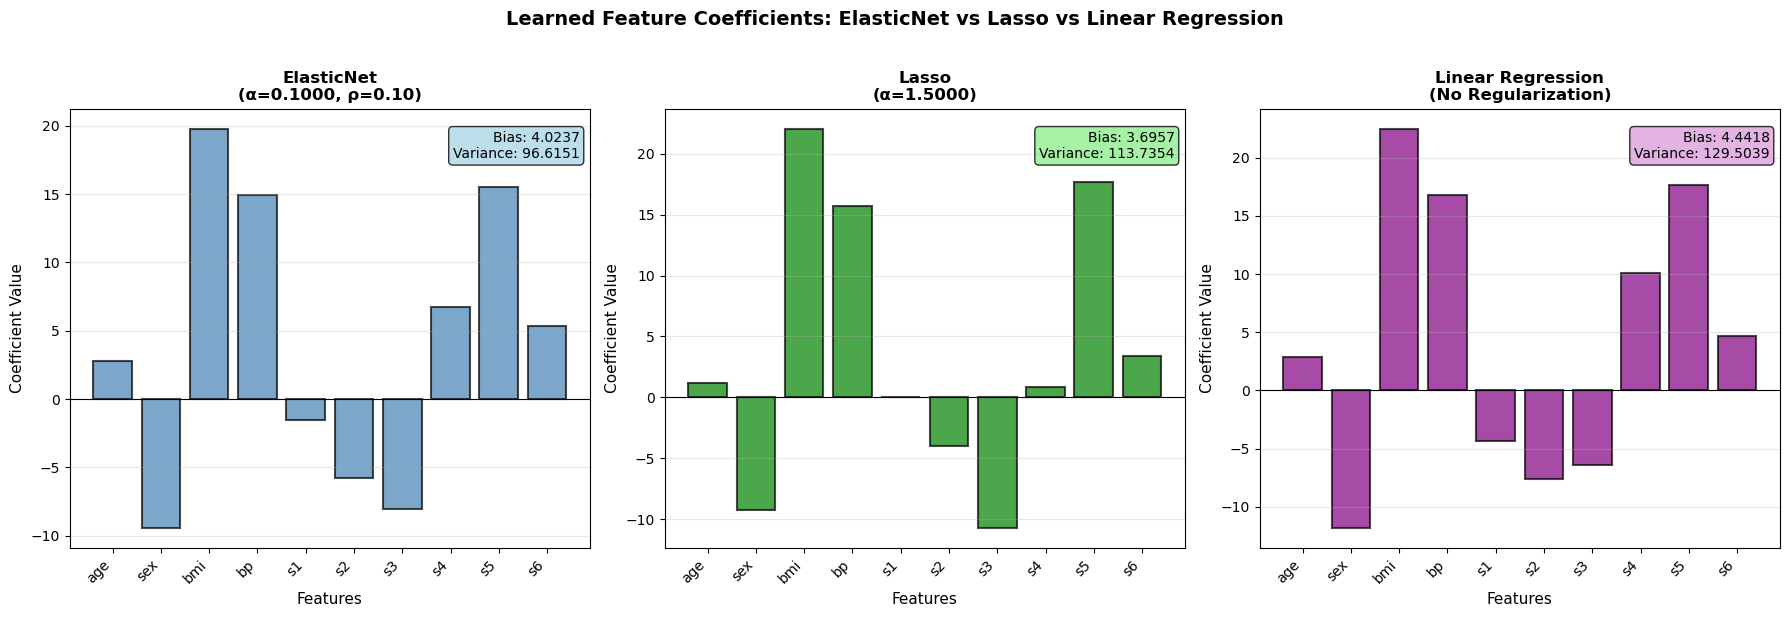


Key Observations:
- ElasticNet (blue) shows L1+L2 regularization effects
- Lasso (green) shows L1 feature selection (2 features dropped)
- Linear Regression (purple) uses all features without regularization
- Bias = mean coefficient value; Variance = spread of coefficients
- Lower variance indicates more regularization/feature elimination


In [21]:
print("\n" + "="*70)
print("EXAMINING LEARNED FEATURE COEFFICIENTS")
print("="*70)

# Get feature names (all columns except 'target')
if 'target' not in df.columns:
    raise ValueError("Error: 'target' column not found in dataset!")
feature_names = [col for col in df.columns if col != 'target']

# Display coefficients for all three models
print("\n1. ELASTICNET COEFFICIENTS")
print("-" * 70)
print(f"Alpha: {final_alpha_en:.4f}, Rho: {final_rho_en:.2f}")
print("\nFeature Coefficients:")
for i, name in enumerate(feature_names):
    print(f"  {name:>15}: {final_en_model.weights[i]:>10.6f}")
print(f"\nBias: {final_en_model.bias:.6f}")
print(f"Non-zero coefficients: {np.sum(np.abs(final_en_model.weights) > 1e-2)}/10")

# List eliminated features for ElasticNet
en_zero_idx = np.where(np.abs(final_en_model.weights) < 1e-2)[0]
if len(en_zero_idx) == 0:
    print("ElasticNet eliminated features: none")
else:
    en_zero_features = [feature_names[i] for i in en_zero_idx]
    print(f"ElasticNet eliminated features: {en_zero_features}")

print("\n" + "="*70)
print("2. LASSO COEFFICIENTS")
print("-" * 70)
print(f"Alpha: {lasso_alpha_final:.4f}")
print("\nFeature Coefficients:")
for i, name in enumerate(feature_names):
    print(f"  {name:>15}: {final_lasso_model.weights[i]:>10.6f}")
print(f"\nBias: {final_lasso_model.bias:.6f}")
print(f"Non-zero coefficients: {np.sum(np.abs(final_lasso_model.weights) > 1e-2)}/10")

# List eliminated features for Lasso
lasso_zero_idx = np.where(np.abs(final_lasso_model.weights) < 1e-2)[0]
if len(lasso_zero_idx) == 0:
    print("Lasso eliminated features: none")
else:
    lasso_zero_features = [feature_names[i] for i in lasso_zero_idx]
    print(f"Lasso eliminated features: {lasso_zero_features}")

print("\n" + "="*70)
print("3. LINEAR REGRESSION COEFFICIENTS")
print("-" * 70)
print("\nFeature Coefficients:")
for i, name in enumerate(feature_names):
    print(f"  {name:>15}: {lr_sklearn.coef_[i]:>10.6f}")
print(f"\nIntercept: {lr_sklearn.intercept_:.6f}")
print(f"Non-zero coefficients: 10/10 (all features used)")

# Create visualizations
print("\n" + "="*70)
print("COEFFICIENT COMPARISON VISUALIZATION")
print("="*70)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# ElasticNet coefficients
ax = axes[0]
ax.bar(range(len(feature_names)), final_en_model.weights, color='steelblue', alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_title(f'ElasticNet\n(α={final_alpha_en:.4f}, ρ={final_rho_en:.2f})', 
             fontsize=12, fontweight='bold')
ax.set_xlabel('Features', fontsize=11)
ax.set_ylabel('Coefficient Value', fontsize=11)
ax.set_xticks(range(len(feature_names)))
ax.set_xticklabels(feature_names, rotation=45, ha='right')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(axis='y', alpha=0.3)
bias_en = np.mean(final_en_model.weights)
var_en = np.var(final_en_model.weights)
ax.text(0.98, 0.95, f'Bias: {bias_en:.4f}\nVariance: {var_en:.4f}', 
        transform=ax.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# Lasso coefficients
ax = axes[1]
ax.bar(range(len(feature_names)), final_lasso_model.weights, color='green', alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_title(f'Lasso\n(α={lasso_alpha_final:.4f})', 
             fontsize=12, fontweight='bold')
ax.set_xlabel('Features', fontsize=11)
ax.set_ylabel('Coefficient Value', fontsize=11)
ax.set_xticks(range(len(feature_names)))
ax.set_xticklabels(feature_names, rotation=45, ha='right')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(axis='y', alpha=0.3)
bias_lasso = np.mean(final_lasso_model.weights)
var_lasso = np.var(final_lasso_model.weights)
ax.text(0.98, 0.95, f'Bias: {bias_lasso:.4f}\nVariance: {var_lasso:.4f}', 
        transform=ax.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# Linear Regression coefficients
ax = axes[2]
ax.bar(range(len(feature_names)), lr_sklearn.coef_, color='purple', alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_title('Linear Regression\n(No Regularization)', 
             fontsize=12, fontweight='bold')
ax.set_xlabel('Features', fontsize=11)
ax.set_ylabel('Coefficient Value', fontsize=11)
ax.set_xticks(range(len(feature_names)))
ax.set_xticklabels(feature_names, rotation=45, ha='right')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(axis='y', alpha=0.3)
bias_lr = np.mean(lr_sklearn.coef_)
var_lr = np.var(lr_sklearn.coef_)
ax.text(0.98, 0.95, f'Bias: {bias_lr:.4f}\nVariance: {var_lr:.4f}', 
        transform=ax.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='plum', alpha=0.8))

plt.suptitle('Learned Feature Coefficients: ElasticNet vs Lasso vs Linear Regression', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\nKey Observations:")
print(f"- ElasticNet (blue) shows L1+L2 regularization effects")
print(f"- Lasso (green) shows L1 feature selection (2 features dropped)")
print(f"- Linear Regression (purple) uses all features without regularization")
print(f"- Bias = mean coefficient value; Variance = spread of coefficients")
print(f"- Lower variance indicates more regularization/feature elimination")


In [22]:
# Weight analysis - check the relative size of weights
feature_names = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

print("="*70)
print("LASSO WEIGHT ANALYSIS")
print("="*70)
max_w_lasso = np.max(np.abs(lasso_final.weights))
print(f"\nMax Weight: {max_w_lasso:.4f}")
print(f"5% Cutoff Value: {0.05 * max_w_lasso:.4f}")
print("-" * 70)
for name, w in zip(feature_names, lasso_final.weights):
    ratio = abs(w) / max_w_lasso if max_w_lasso > 0 else 0
    print(f"{name:<10} | Weight: {abs(w):>8.4f} | % of Max: {ratio*100:>6.2f}%")

print("\n" + "="*70)
print("ELASTICNET WEIGHT ANALYSIS")
print("="*70)
max_w_en = np.max(np.abs(final_en.weights))
print(f"\nMax Weight: {max_w_en:.4f}")
print(f"5% Cutoff Value: {0.05 * max_w_en:.4f}")
print("-" * 70)
for name, w in zip(feature_names, final_en.weights):
    ratio = abs(w) / max_w_en if max_w_en > 0 else 0
    print(f"{name:<10} | Weight: {abs(w):>8.4f} | % of Max: {ratio*100:>6.2f}%")


LASSO WEIGHT ANALYSIS

Max Weight: 22.0353
5% Cutoff Value: 1.1018
----------------------------------------------------------------------
age        | Weight:   1.2199 | % of Max:   5.54%
sex        | Weight:   9.2014 | % of Max:  41.76%
bmi        | Weight:  22.0353 | % of Max: 100.00%
bp         | Weight:  15.6925 | % of Max:  71.22%
s1         | Weight:   0.0000 | % of Max:   0.00%
s2         | Weight:   3.9613 | % of Max:  17.98%
s3         | Weight:  10.7252 | % of Max:  48.67%
s4         | Weight:   0.8196 | % of Max:   3.72%
s5         | Weight:  17.6958 | % of Max:  80.31%
s6         | Weight:   3.3816 | % of Max:  15.35%

ELASTICNET WEIGHT ANALYSIS

Max Weight: 19.7877
5% Cutoff Value: 0.9894
----------------------------------------------------------------------
age        | Weight:   2.7468 | % of Max:  13.88%
sex        | Weight:   9.4634 | % of Max:  47.82%
bmi        | Weight:  19.7877 | % of Max: 100.00%
bp         | Weight:  14.9402 | % of Max:  75.50%
s1         | Weigh